# Project - Campaign for selling personal loans.

## Importing necessary liraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")  # To ingnore any warnings

## Reading and viewing data.

In [2]:
df_bplm=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
df_copy=df_bplm.copy()
df_bplm.head().append(df_bplm.tail())

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


## Exploring data.

In [3]:
df_bplm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### INFERENCES:- We have 13 independent variables and 1 dependent variable i.e. ‘Personal Loan’ in the data set. Also, we got good amount of data (i.e.5000 rows) to test & train datasets.

In [4]:
df_bplm.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

####  INFERENCES:-No columns have null values in the dataset.

In [5]:
df_bplm.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Inferences:-
#### 1.Age of majority customers falls between 30 years and 60 years and mean is 45 years.
#### 2.Experience attribute has negative values.
#### 3.CCAvg is between 0K to 10K and majority spends less than 2.5K.

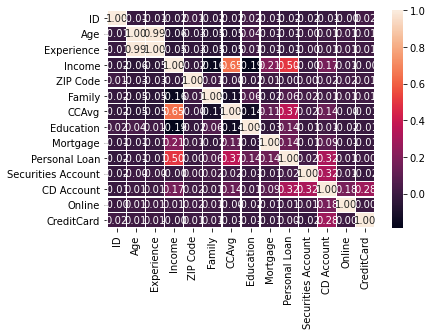

In [6]:
sns.heatmap(df_bplm.corr(), annot=True, linewidths=.4, fmt= '.2f')

#### Inference:-
#### 1.Personal Loan is highly correlated with Income, average spending on Credit cards, if the customer has a certificate of deposit (CD) account with the bank,mortgage and education.
#### 2. Experience is highly correlated with Age. We can drop experience.

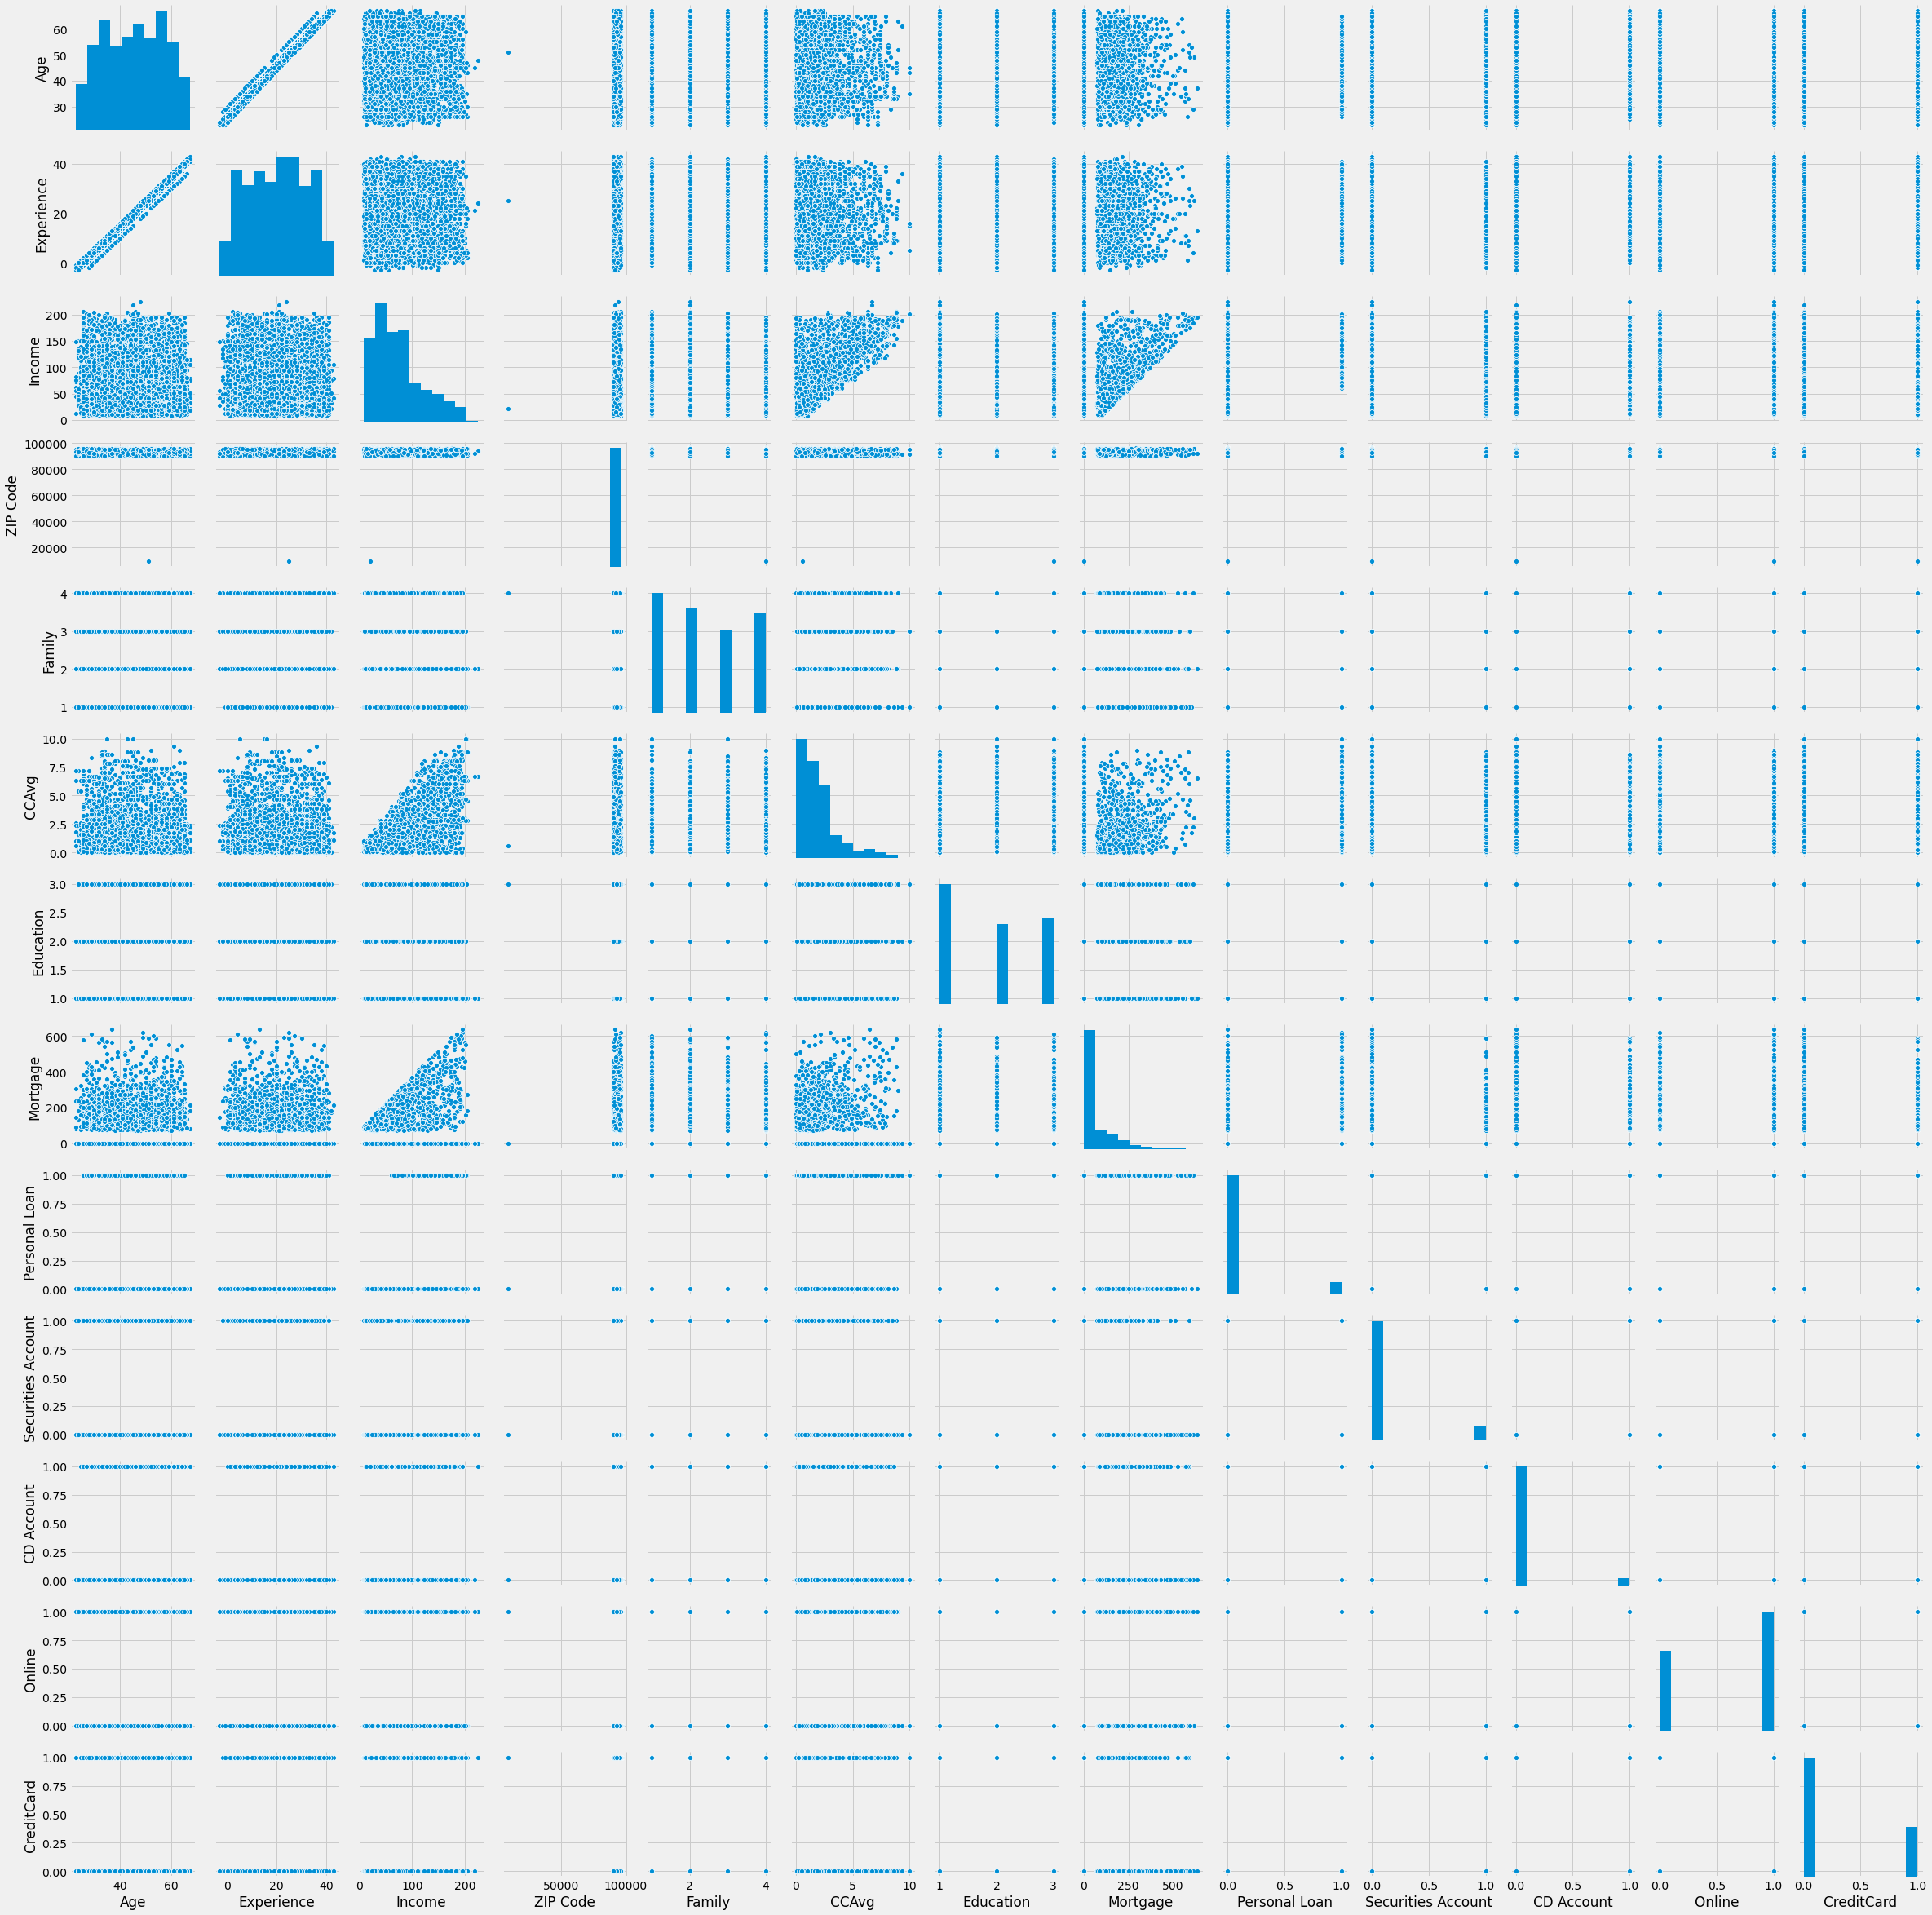

In [7]:
plt.style.use('fivethirtyeight')
sns.pairplot(df_bplm.iloc[:,1:])

#### Infernece:-
#### 1.Income is moderately positively skewed. Majority of the customers have income between 45K and 55K.
#### 2.CCAvg is also a highly positively skewed.
#### 3. Mortgage is highly positively skewed.

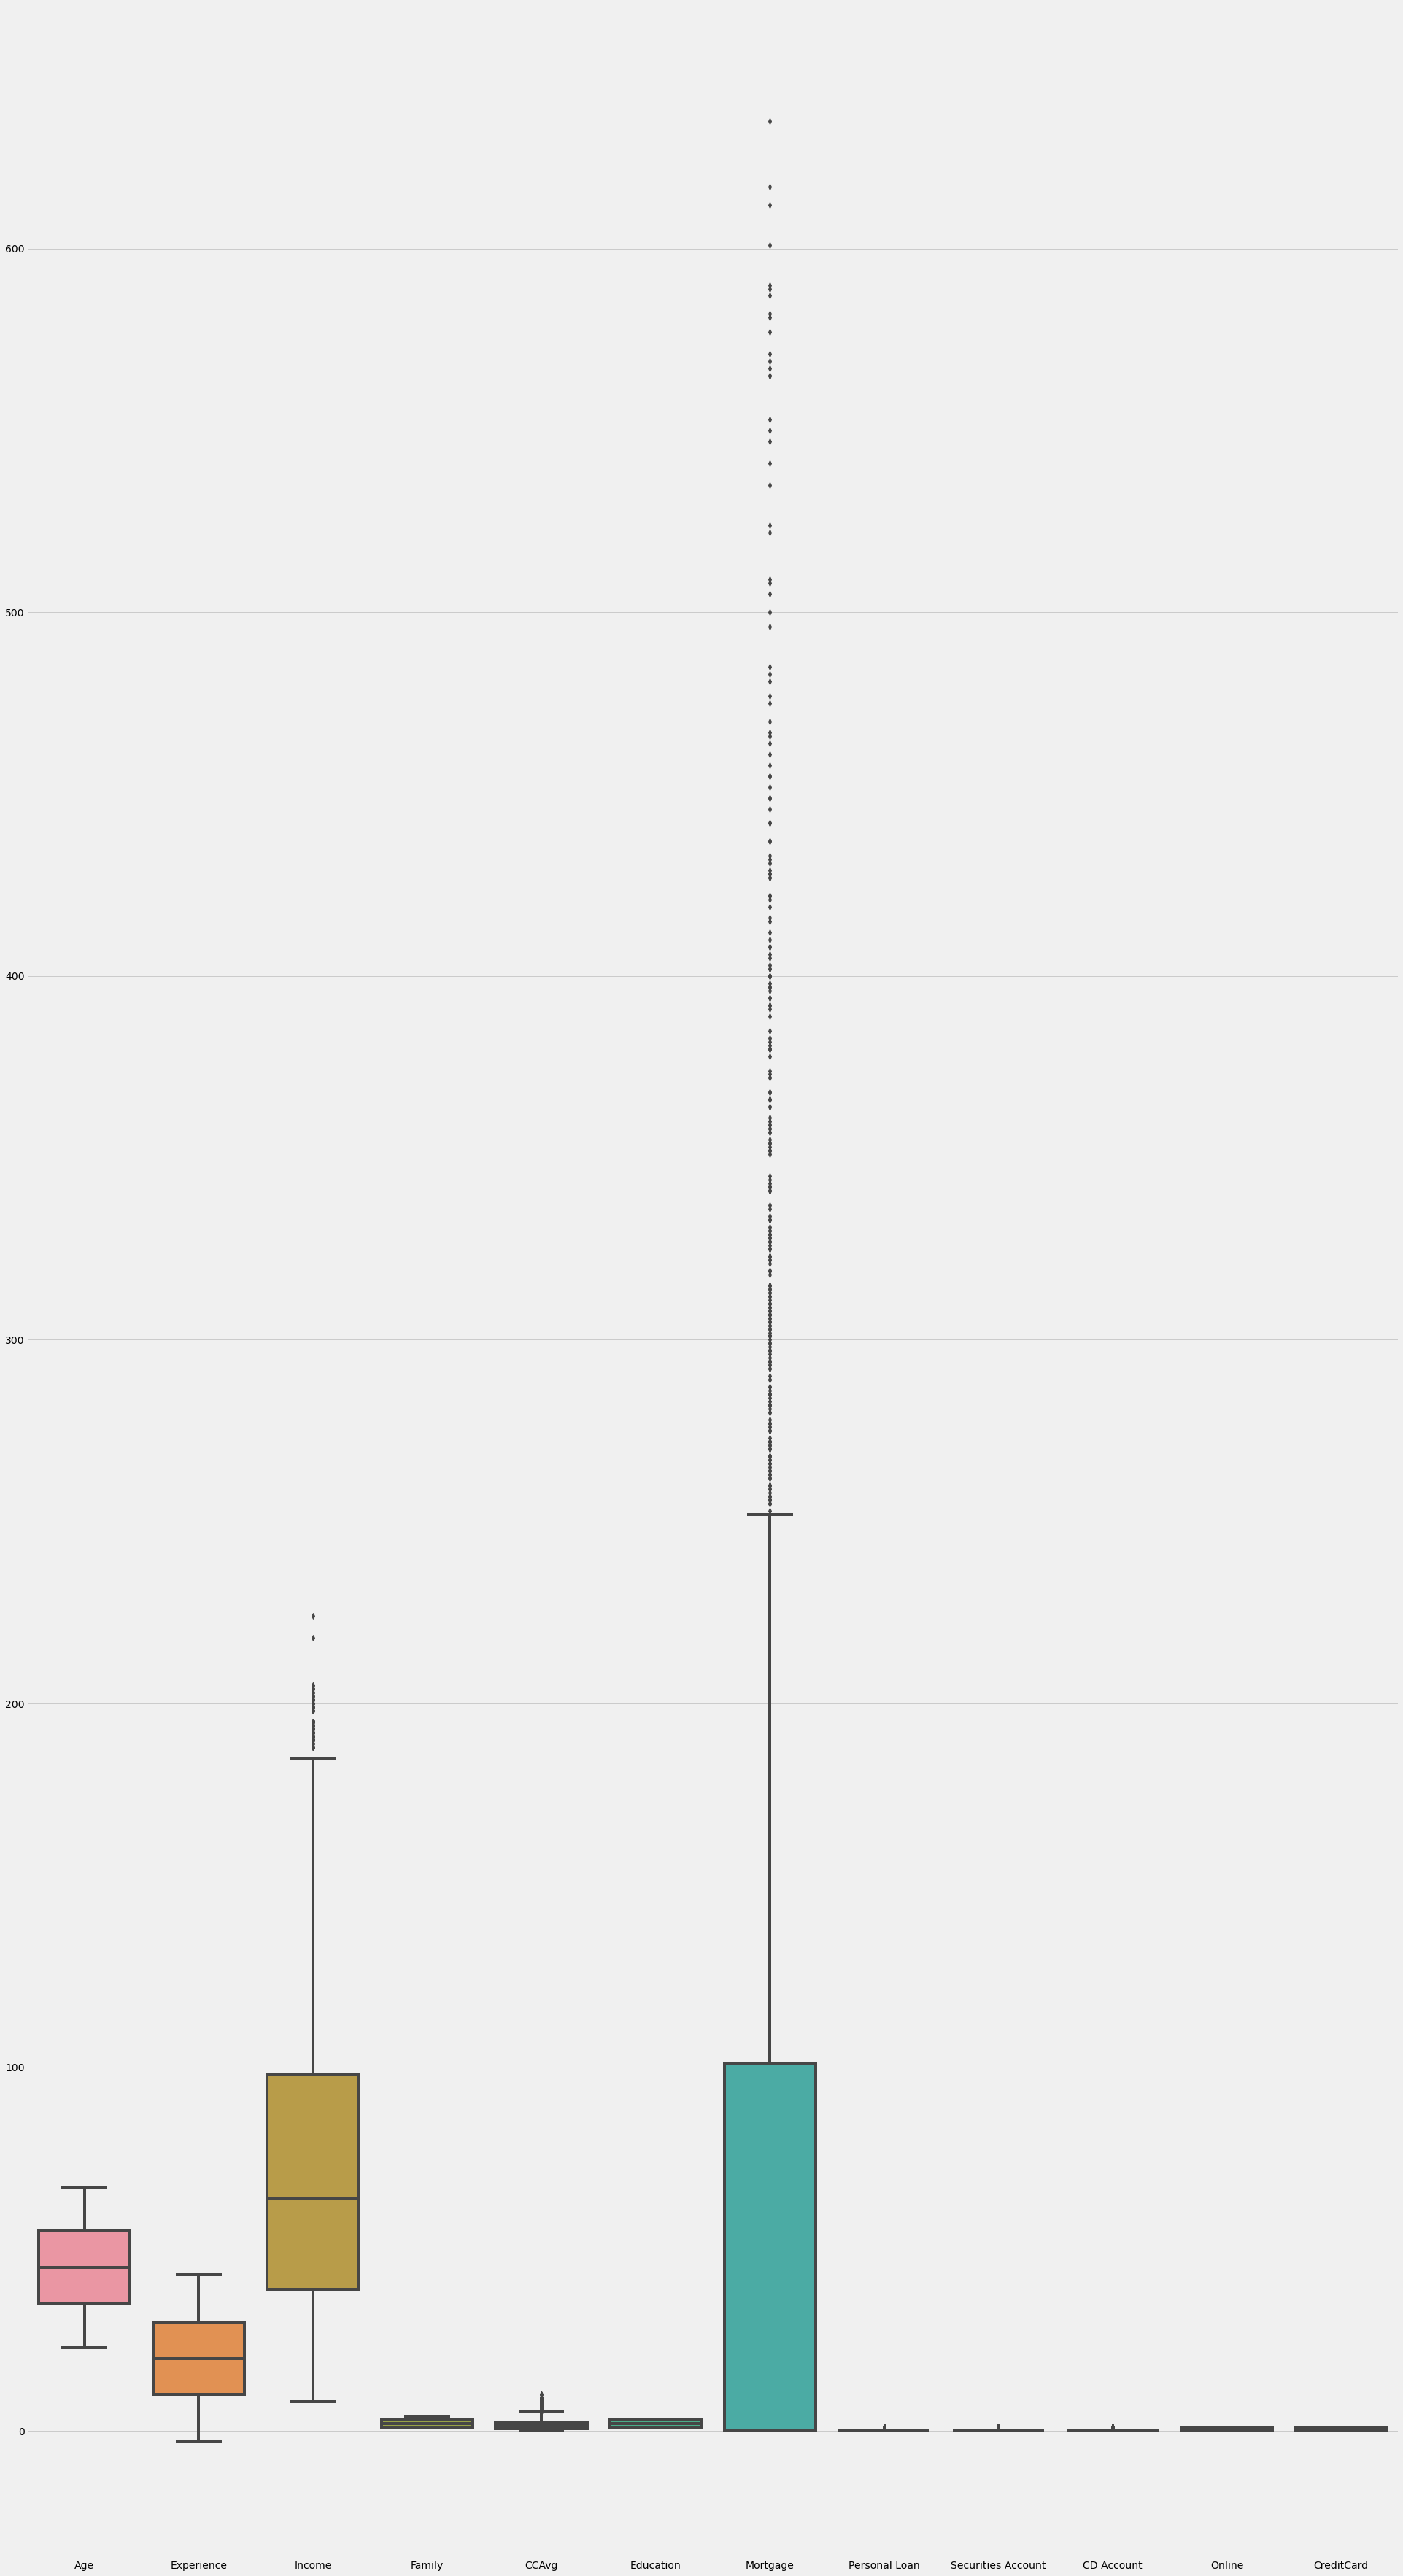

In [8]:
plt.style.use('seaborn-pastel')
plt.figure(figsize= (30,60))
sns.boxplot(data=df_bplm.iloc[:,[False,True,True,True,False,True,True,True,True,True,True,True,True,True,]])

#### Infernece:- Mortgage has lots of outliers.

In [9]:
df_bplm['Personal Loan'].value_counts() 

0    4520
1     480
Name: Personal Loan, dtype: int64

#### Infernece:- About 9% customers opted for personal loan in last year campaign.

## Droping unessential columns

In [10]:
df_bplm.drop('ID',axis=1,inplace=True)
df_bplm.drop('Experience',axis=1,inplace=True)
df_bplm.drop('ZIP Code',axis=1,inplace=True)
df_bplm.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


### Treating Outliers

In [11]:
from scipy import stats
df_bplm['Mortgage_zscore']=np.abs(stats.zscore(df_bplm['Mortgage'])) # Treating outliers
df_bplm=df_bplm[df_bplm['Mortgage_zscore']<3]
df_bplm.drop('Mortgage_zscore',axis=1,inplace=True)

In [12]:
df_bplm.shape

(4895, 11)

#### NOTE:-Droppng 105 rows which contain outliers by filtering zscore values.

## Splitting into train and test in 70:30 ratio.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [14]:
X=df_bplm.drop('Personal Loan',axis=1)
y=df_bplm['Personal Loan']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state=1)

## 1.Logistic Regression

In [15]:
LogReg_model=LogisticRegression()
LogReg_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_predict=LogReg_model.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.9469026548672567
[[1323   18]
 [  60   68]]


In [17]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)

In [18]:
LogReg_model=LogisticRegression()
LogReg_model.fit(scaled_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_predict=LogReg_model.predict(scaled_X_test)
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.9530292716133424
[[1324   17]
 [  52   76]]


## 2.Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(scaled_X_train, y_train)

y_predict = naive_model.predict(scaled_X_test)
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.8944860449285228
[[1238  103]
 [  52   76]]


## 3. KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(scaled_X_train,y_train)

y_predict = KNN_model.predict(scaled_X_test)
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.9646017699115044
[[1333    8]
 [  44   84]]


### In KNN we are with around 97% accuracy in determining if a customer will buy the personal loan or not. Also, the recall value is 66% is much better than logistic regression and Naive Bayes algorithms. 
### Therefore KNN is the best model amongst the three.